In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def softmax(beta, q):
    return (np.exp(q / (beta+1e-4))) / sum(np.exp(q / (beta+1e-4)))

def prediction_error(a , b): return a-b

def update_q_table(q_table,action,reward,alpha):
    q_table[action] = q_table[action] + (alpha * (prediction_error(reward,q_table[action])))

In [3]:
def sim_a_policy():
    
    # set 1 to pritn every trail 
    PRINT_EACH_TRAIL = 0
    
    # set parameters

    # set num of trails
    num_of_trails = 30_000

    # set num of arms
    num_of_arms = 4

    # create the q_table 
    q_table = np.zeros(num_of_arms)

    # set Learning Rate -  α  
    alpha = 0.1

    # set beta - temperature - β (sowftMax)
    beta = 0.1

    # probabilty for a reward for each action in stage 2
    prob_reward = np.array(
                            [.3,.9,.1,.1]
                        )

    reward_list = np.zeros(num_of_trails)

    action_list = np.zeros(num_of_trails)

    regret_list = np.zeros(num_of_trails)

    sum_of_reg = 0
       
    for t in range(num_of_trails):

        # calc softMax
        prob = softmax(beta,q_table)
        
        # choose an action according to sowftMax
        action = np.random.choice(range(num_of_arms) , p = prob)
        action_list[t] = action

        # cheek if the trail is rewarded according to probs 
        reward = np.random.choice([0,1] , p = [1-prob_reward[action],prob_reward[action]])

        reward_list[t] = reward

        sum_of_reg += prob_reward[int(action)]

        regret_list[t] = t*np.max(prob_reward) - sum_of_reg

        # update q_table according to q_learning formula
        update_q_table(q_table,action,reward,alpha)
    
    return {'action' :action_list ,  'reward' : reward_list , 'regret' : regret_list};

In [4]:
data = sim_a_policy()
df = pd.DataFrame(data,columns = ['action' ,'reward','regret'])
print("The avarge rewared is = {}".format(df['reward'].mean()))

print(df.head(10))
print(df.groupby(['action']).count())

The avarge rewared is = 0.8980333333333334
   action  reward  regret
0     2.0     0.0    -0.1
1     3.0     0.0     0.7
2     3.0     0.0     1.5
3     0.0     0.0     2.1
4     2.0     0.0     2.9
5     0.0     0.0     3.5
6     0.0     1.0     4.1
7     0.0     0.0     4.7
8     0.0     1.0     5.3
9     1.0     1.0     5.3
        reward  regret
action                
0.0        112     112
1.0      29869   29869
2.0          9       9
3.0         10      10


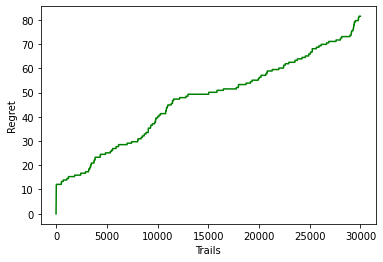

In [5]:
plt.plot(data['regret'], color="green")
plt.xlabel("Trails")
plt.ylabel("Regret")
plt.show()